# Imports

In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

# Load Data

In [5]:
# Create pandas dataframe from csv
df_v1 = pd.read_csv("../logs/MainLog-1_WithTarjan.csv", sep=",", header=0)
df = pd.read_csv("../logs/MainLog-2_04.csv", sep=",", header=0)

dfMinMaxK = pd.read_csv("../logs/OverviewMinMaxK.csv", sep=",", header=0)
dfNandMCount = pd.read_csv("../logs/NodesAndEdgesCount.csv", sep=",", header=0)

# Merge
dfWT = df_v1.merge(dfNandMCount, on = "name", how = 'inner')

# Split  synthetic/complex
df_v1Synthetic = df_v1[df_v1['name'].str.match('synth')]
df_v1Complex = df_v1[~df_v1['name'].str.match('synth')]
dfSynthetic = df[df['name'].str.match('synth')]
dfComplex = df[~df['name'].str.match('synth')]

# Mean
df_v1_mean_k = df_v1.groupby('k_optimal').mean()
df_mean_k = df.groupby('k_optimal').mean()

# Style plot
plt.style.use('dark_background')

# Print results

In [6]:
print(df[df['verified'] == False])

numSynthetic = dfSynthetic.shape[0]
dfSyntheticSolved = dfSynthetic[dfSynthetic['verified'] == True]
numSyntheticSolved = dfSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved / numSynthetic) + "%)")

numComplex = dfComplex.shape[0]
dfComplexSolved = dfComplex[dfComplex['verified'] == True]
numComplexSolved = dfComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved / numComplex) + "%)")

numGeneral = df.shape[0]
dfSolved = df[df['verified'] == True]
numSolved = dfSolved.shape[0]
print("General: " + str(numSolved) + "/" + str(numGeneral)
      + " (" + str(numSolved / numGeneral) + "%)")

                               name  k_optimal  k_solved  millis  verified
135     biology-n_49-m_689-p_0.5-14         29         0  180000     False
136    biology-n_49-m_689-p_0.75-14         26         0  180000     False
138      biology-n_56-m_526-p_0.5-2         29         0  180000     False
151              GD-n_121-m_207.mtx         43         8  180000     False
158               GD-n_62-m_287.mtx         38         0  180000     False
167  moreno_innovation-n_241-m_1098         79         0  180000     False
Synthetic: 72/72 (1.0%)
Complex: 95/101 (0.9405940594059405%)
General: 167/173 (0.9653179190751445%)


# Line Plot k BFS

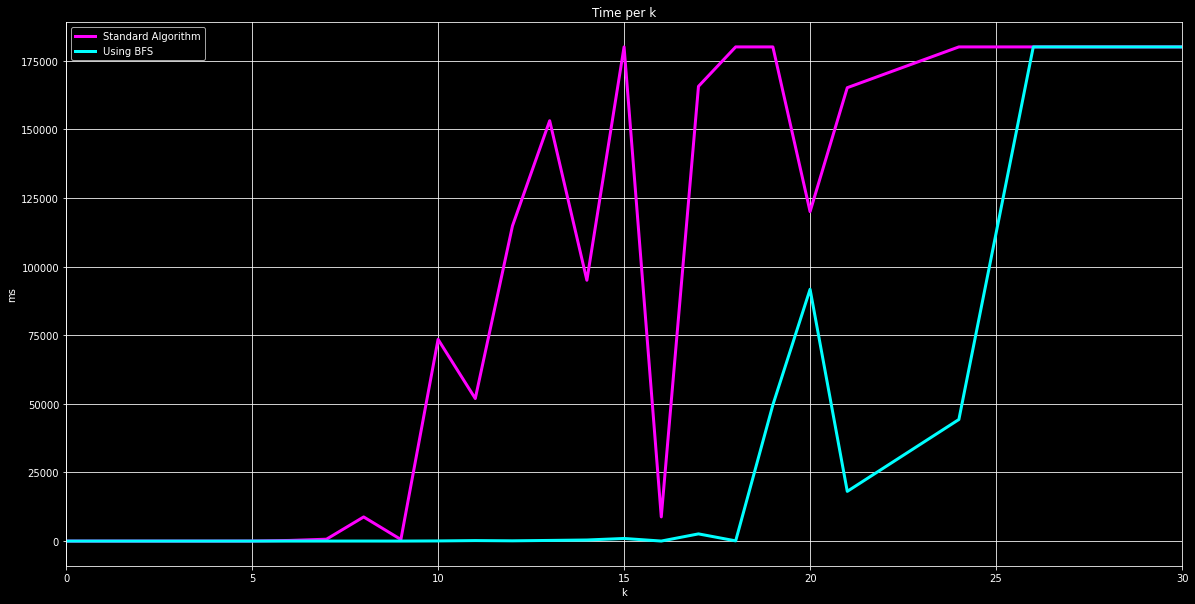

In [7]:

plt.figure(figsize=(20,10))
plt.plot(df_v1_mean_k['millis'], c='magenta', linewidth='3', label="Standard Algorithm")
plt.plot(df_mean_k['millis'], c='aqua', linewidth='3', label="Using BFS")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.xlim([0, 30])
plt.grid()
plt.legend()
plt.savefig('plots/KLinePlotBFS.png',  bbox_inches='tight')
plt.show()

# Line Plot k (Complex vs Synthetic)

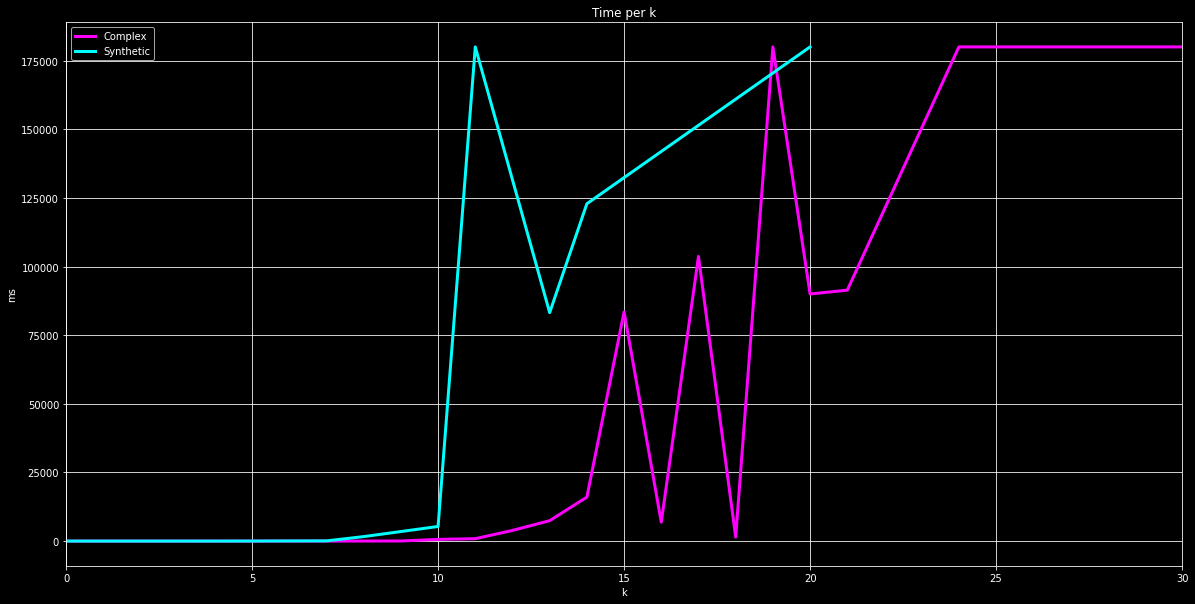

In [6]:
# Calculate mean for all k's
dfSyntheticMean = dfSynthetic.groupby('k_optimal').mean()
dfComplexMean = dfComplex.groupby('k_optimal').mean()

plt.figure(figsize=(20,10))
plt.plot(dfComplexMean['millis'], c='magenta', linewidth='3', label="Complex")
plt.plot(dfSyntheticMean['millis'], c='aqua', linewidth='3', label="Synthetic")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.xlim([0, 30])
plt.grid()
plt.legend()
#plt.savefig('plots/test.png',  bbox_inches='tight')
plt.show()